### This model takes in bitcoin transaction data from the some of the most widely used cryptocurrency exchanges around the world and predicts the bitcoin opening and closing price (in dollars) using Bi-directional LSTM (for opening prices) and RNN (for closing prices) which further helps in comparing the accuracy of the two models against the highly volatile bitcoin price. 
### The data used in this model contains Bitcoin transaction data at 1-min intervals from exchanges with higher transaction volumes, Jan 2012 to March 2021.

In [381]:
##IMPORTING ALL THE REQUIRED LIBRARIES

#data manipulation
import numpy as np
import pandas as pd
from scipy import stats
from math import sqrt
from random import randint
from datetime import datetime

#sklearn and keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , LSTM , Dropout , Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Graphs and data tabulation
import plotly.offline as py
import plotly.graph_objs as go
from matplotlib import pyplot as plt
import seaborn
import missingno as msno #to visualize missing data


py.init_notebook_mode(connected=True)
%matplotlib inline

In [382]:
import warnings
warnings.filterwarnings("ignore")

### DATA PREPROCESSING PHASE

#### The data in this csv file contains Bitcoin transaction data at 1-min intervals from select exchanges(exchanges with higher transaction volumes) , Jan 2012 to March 2021

In [383]:
##READING THE CSV BITCOIN DATA FILE INTO PANDAS DATAFRAME


data = pd.read_csv('Bitcoin_data_per_min_from_2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [385]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [387]:
data.shape

(4857377, 8)

### This file, as can be seen, can have many NaN values and hence we first need to drop those but let us first confirm and visualize the missing data i.e. the NaN values

In [388]:
data.isna().sum() ##To confirm

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

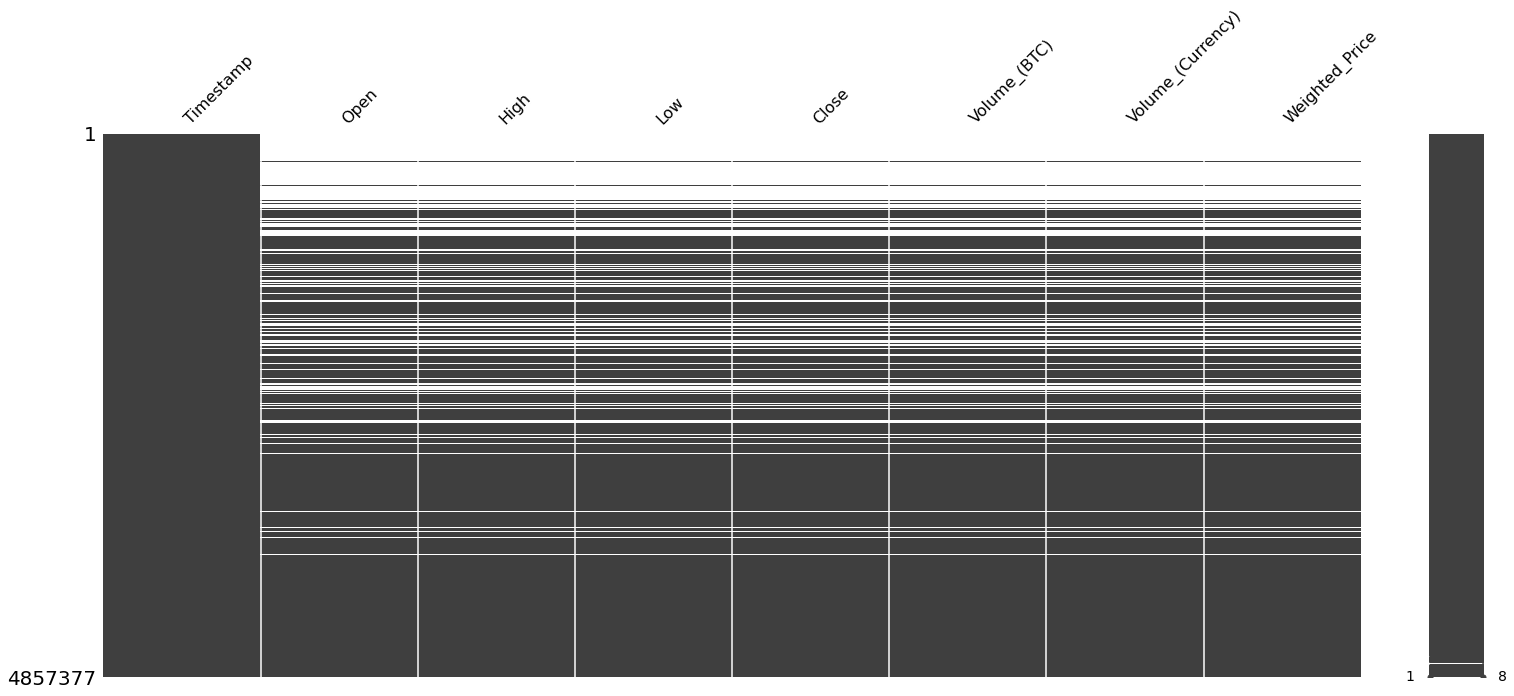

In [389]:
msno.matrix(data)
plt.show()

### Dropping the NaN values and resetting index 

In [390]:
data = data.dropna().reset_index(drop=True)

In [391]:
data.isna().sum() ##To confirm

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

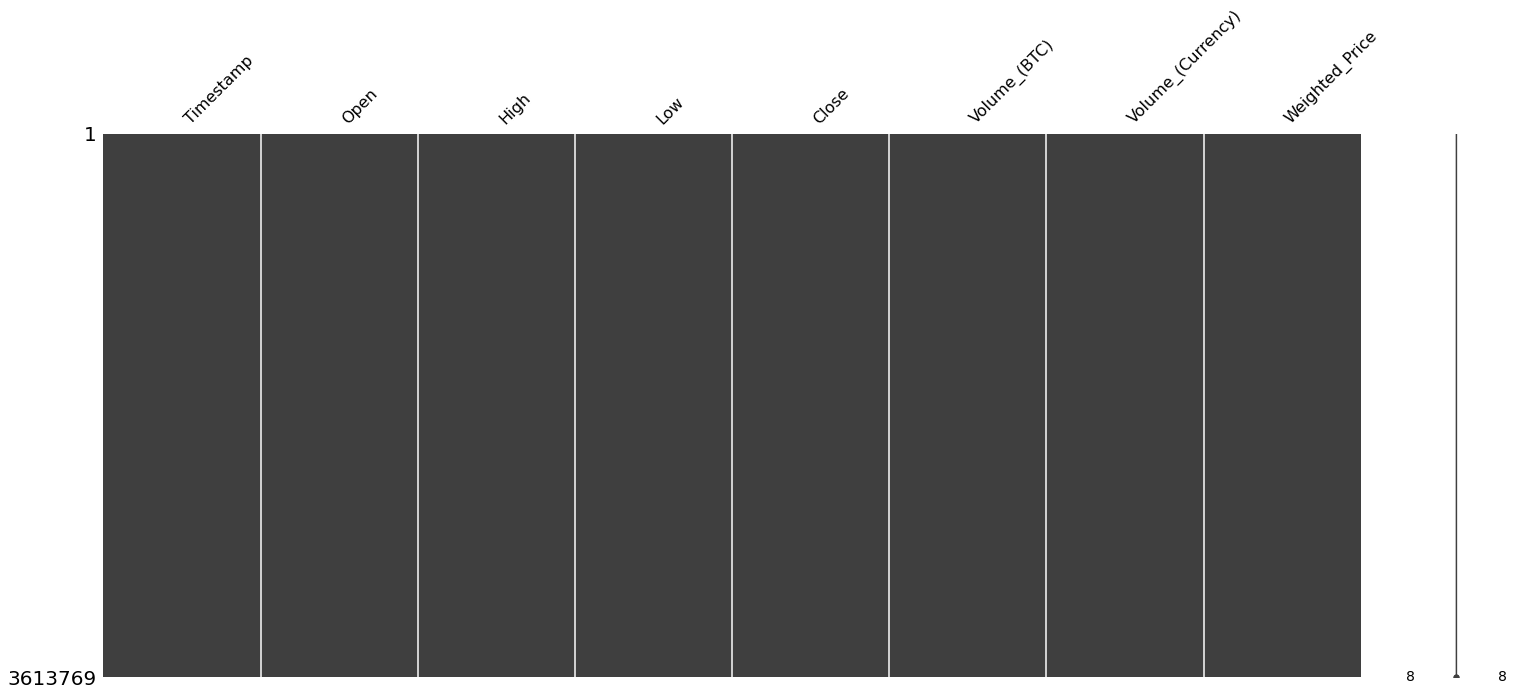

In [392]:
msno.matrix(data)
plt.show()

In [393]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [394]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3613764,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
3613768,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [395]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.497898e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,7.443689e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.433683e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.505880e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.562208e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [396]:
data.shape

(3613769, 8)

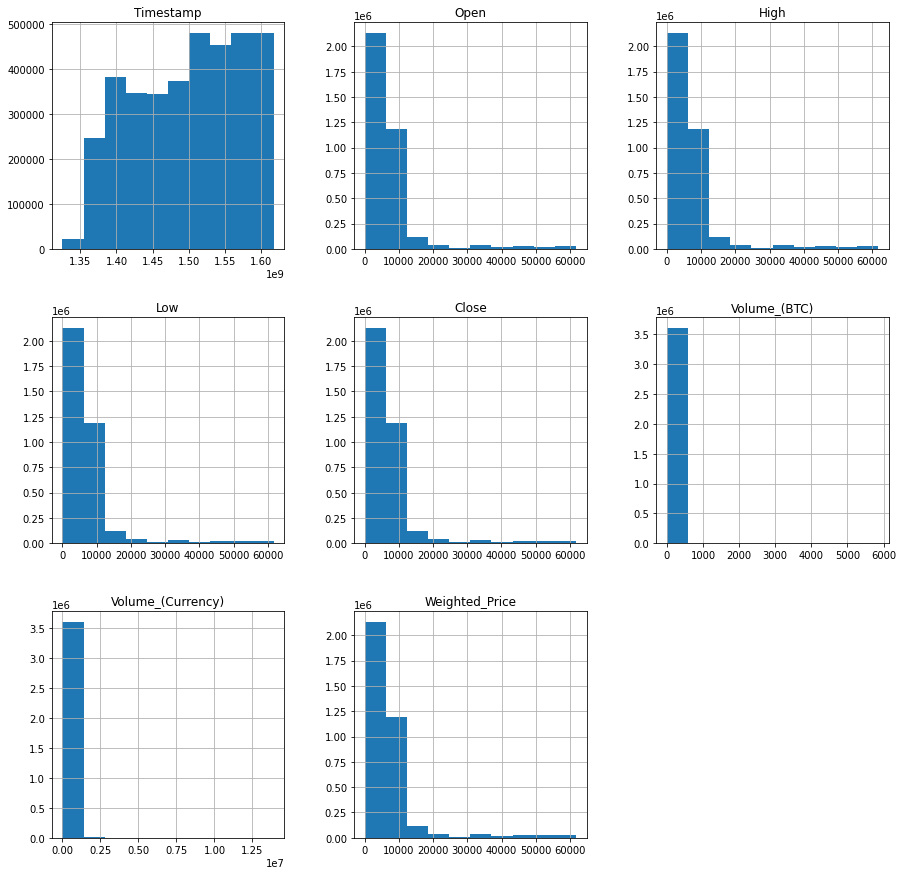

In [397]:
data.hist(figsize = (15,15))
plt.show()

### The given data file has timestamps of various transactions recorded in a 1 min interval but to proceed we must first convert this data in usual date-time format with average transaction weighted_price everyday

In [398]:
data_RNN = data #to be used later in simple RNN model
data.Timestamp = pd.to_datetime(data.Timestamp , unit = 's')
data['date']= data.Timestamp.dt.date

In [399]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
1,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
2,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
3,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
4,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01


In [400]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
3613764,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30
3613765,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30
3613766,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30
3613767,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30
3613768,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363,2021-03-31


In [401]:
data_per_day = data.groupby(data.date).mean()

In [402]:
data_per_day

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
date,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159
...,...,...,...,...,...,...,...
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819


In [403]:
data_per_day.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3376.0,4605.644798,8207.258774,4.331667,244.954735,697.954849,7242.739376,60458.339735
High,3376.0,4608.916329,8213.768034,4.331667,245.046306,698.221190,7248.233526,60488.868334
Low,3376.0,4602.220278,8200.562238,4.331667,244.869102,697.654114,7238.040275,60426.441554
Close,3376.0,4605.640430,8207.368264,4.331667,244.959590,697.921509,7242.417035,60458.888892
Volume_(BTC),3376.0,10.355675,8.897358,0.250000,4.671673,7.622244,13.114867,119.522868
Volume_(Currency),3376.0,31790.810259,62753.976425,1.227500,1916.186042,6832.004108,36074.508308,950995.602917
Weighted_Price,3376.0,4605.576442,8207.031620,4.331667,244.952580,697.948484,7242.892623,60455.844831


In [404]:
data_per_day.shape

(3376, 7)

## Visualization of the data from 2011-12-31 to 2021-03-31

In [405]:
features = np.array(data_per_day.columns)

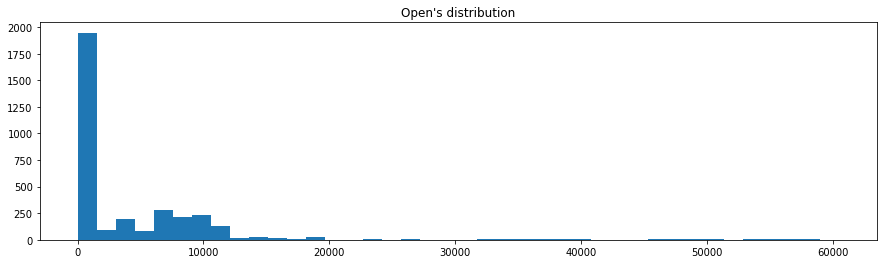

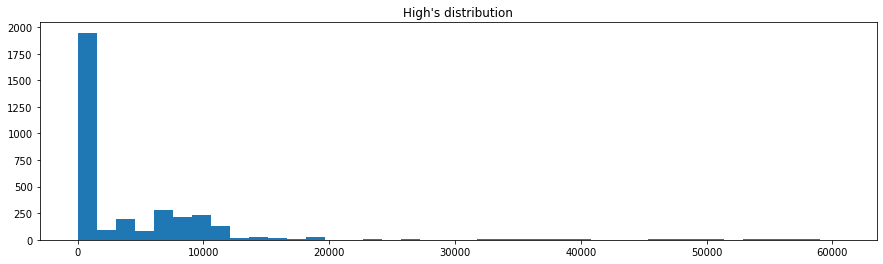

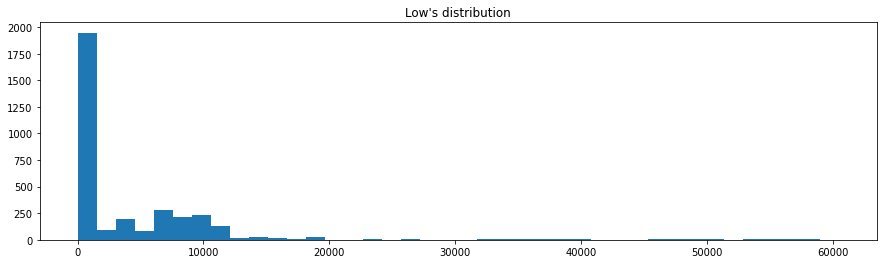

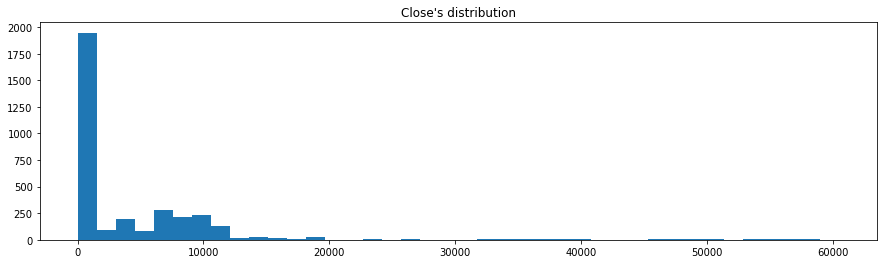

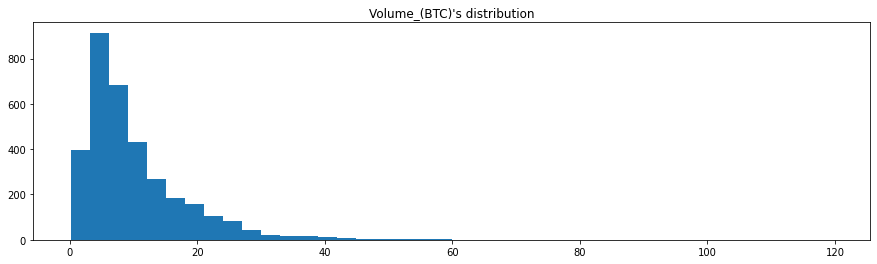

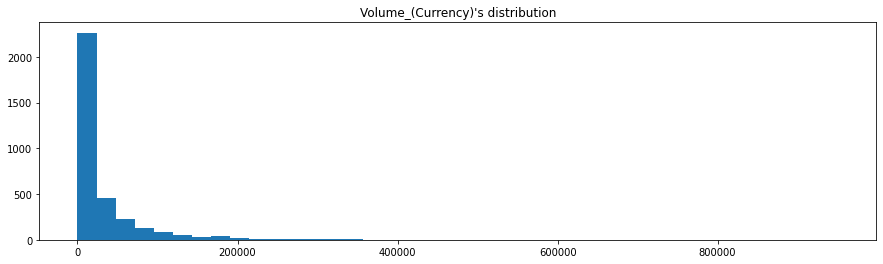

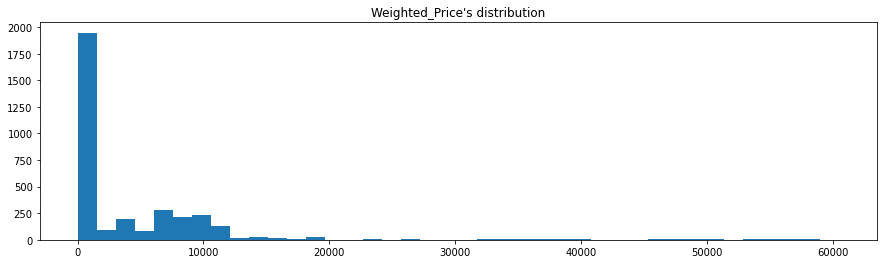

In [406]:
for f in features :
    plt.figure(figsize=(15,4))
    plt.hist( data_per_day[f],bins = 40) ; 
    plt.title("{}\'s distribution".format(f))

<Figure size 2160x2160 with 0 Axes>

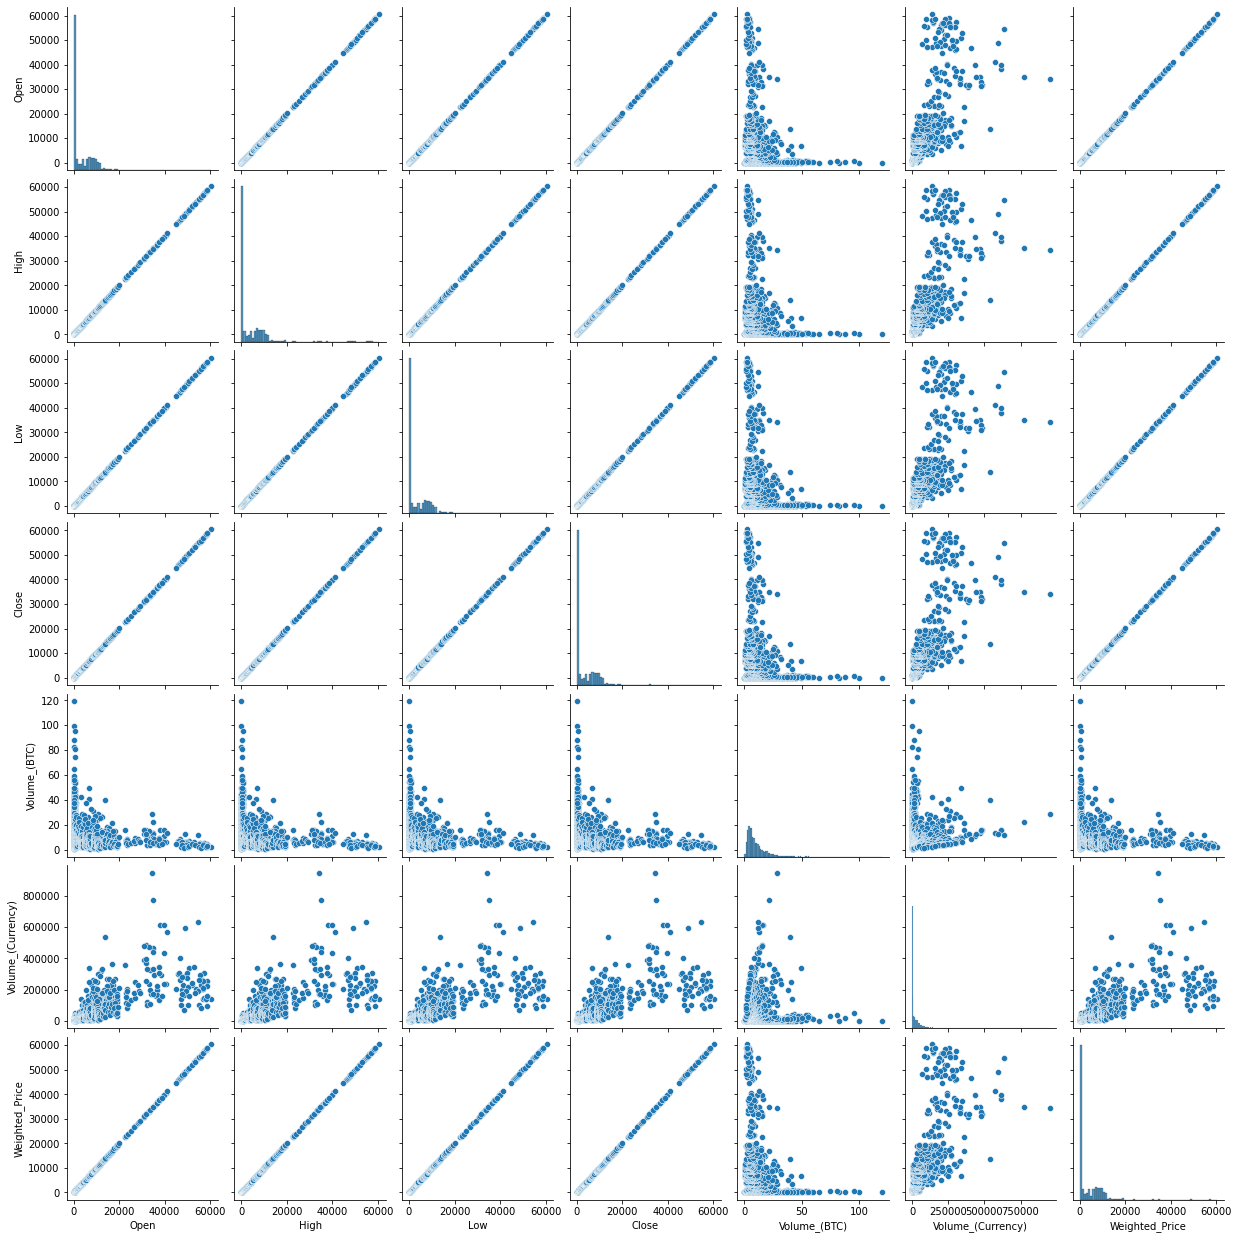

In [407]:
plt.figure(figsize = (30,30))
sns.pairplot(data_per_day)

<AxesSubplot:>

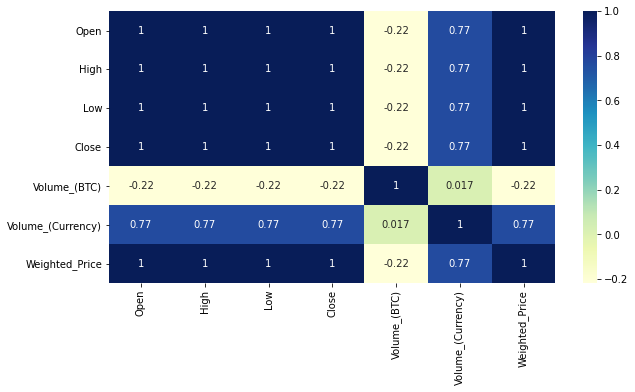

In [408]:
plt.figure(figsize = (10,5))
sns.heatmap(data_per_day.corr(), annot = True ,cmap = 'YlGnBu')

##### Open, High, Low, Close and Weighted_Price are all highly correlated, so either one of them can be used as a feature. One of either Volume_(BTC) or Volume_(Currency) will be the second feature.

In [409]:
data_open  = data_per_day.Open

Text(0.5, 1.0, 'Open Price of Bitcoin over 9 years')

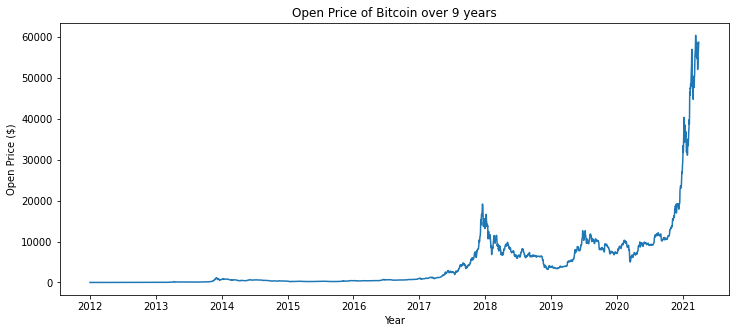

In [410]:
plt.figure(figsize=(12, 5))
plt.plot(data_open) 
plt.xlabel("Year")            
plt.ylabel("Open Price ($)")            
plt.title("Open Price of Bitcoin over 9 years")  

In [411]:
data_close  = data_per_day.Close

Text(0.5, 1.0, 'Closing Price of Bitcoin over 9 years')

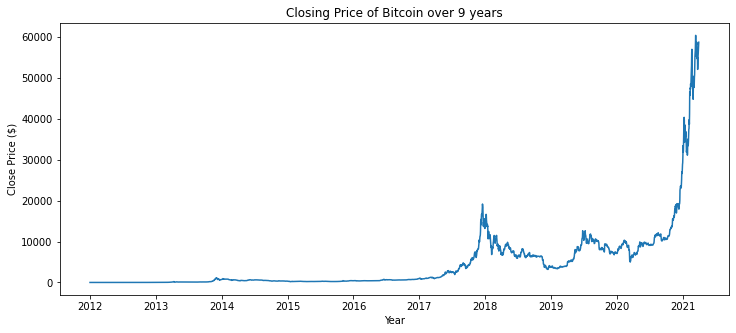

In [412]:
plt.figure(figsize=(12, 5))
plt.plot(data_close) 
plt.xlabel("Year")            
plt.ylabel("Close Price ($)")            
plt.title("Closing Price of Bitcoin over 9 years")  

In [413]:
data = data_per_day.Weighted_Price

Text(0.5, 1.0, 'Weighted Price of Bitcoin over 9 years')

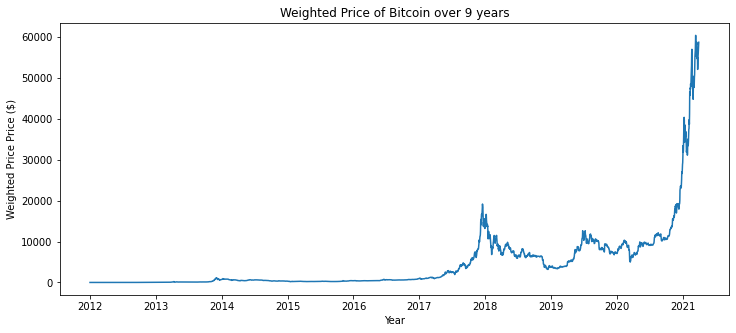

In [414]:
plt.figure(figsize=(12, 5))
plt.plot(data) 
plt.xlabel("Year")            
plt.ylabel("Weighted Price Price ($)")            
plt.title("Weighted Price of Bitcoin over 9 years")  

### BI-DIRECTIONAL LSTM (Predicting opening prices)

In [415]:
data = data.values

In [416]:
max = np.max(data)
data = data/max

In [417]:
X = [data[i:i+10] for i in range(len(data)-11)]
Y = [data[i+10] for i in range(len(data)-11)]

#### TRAIN TEST SPLIT

In [418]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.10 , shuffle= False) #90:10 split

In [419]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [420]:
X_train.shape

(3028, 10)

In [421]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
X_train.shape

(3028, 1, 10)

In [422]:
np.random.seed(0)
model = Sequential([
    Bidirectional(LSTM(64, activation='relu'), input_shape=(1, 10)),
    Dropout(0.15) , 
    Dense(1) 
])
model.compile(loss='mse' , optimizer= 'adam')

In [423]:
history = model.fit( X_train , Y_train , epochs = 60)

Epoch 1/60
95/95 [==============================] - 9s 6ms/step - loss: 0.0010
Epoch 2/60
95/95 [==============================] - 0s 2ms/step - loss: 9.3473e-05
Epoch 3/60
95/95 [==============================] - 0s 4ms/step - loss: 8.8556e-05
Epoch 4/60
95/95 [==============================] - 0s 2ms/step - loss: 8.9309e-05
Epoch 5/60
95/95 [==============================] - 0s 2ms/step - loss: 7.8925e-05
Epoch 6/60
95/95 [==============================] - 0s 2ms/step - loss: 6.5650e-05
Epoch 7/60
95/95 [==============================] - 0s 2ms/step - loss: 7.4847e-05
Epoch 8/60
95/95 [==============================] - 0s 2ms/step - loss: 6.9349e-05
Epoch 9/60
95/95 [==============================] - 0s 2ms/step - loss: 6.9706e-05
Epoch 10/60
95/95 [==============================] - 0s 2ms/step - loss: 6.6797e-05
Epoch 11/60
95/95 [==============================] - 0s 2ms/step - loss: 6.5641e-05
Epoch 12/60
95/95 [==============================] - 0s 2ms/step - loss: 5.9841e-05
Epoch

In [424]:
pred_train = model.predict(X_train)

### epoch loss evolution graph

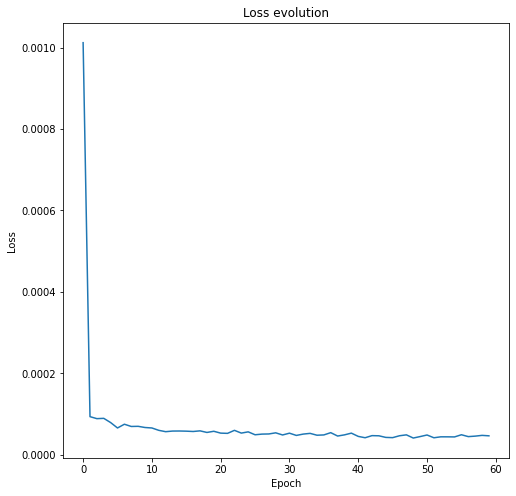

In [425]:
plt.figure(figsize=(8,8));
plt.title("Loss evolution");
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.plot(history.history['loss']);

### Prediction graphs

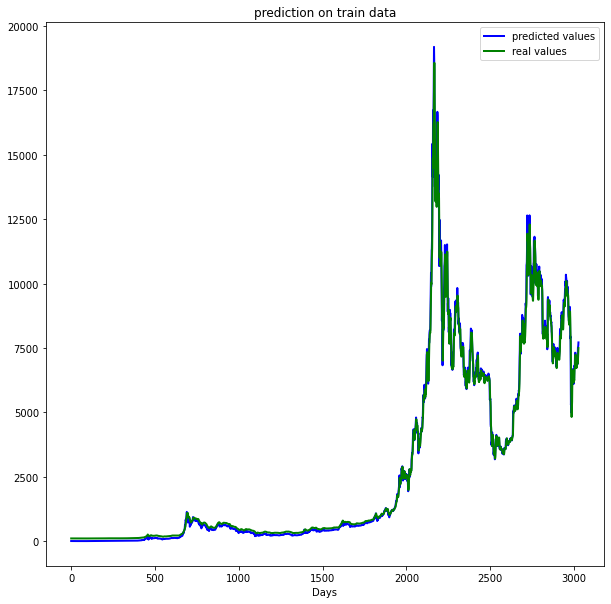

In [426]:
preds1 = pred_train* max
plt.figure( figsize=( 10 , 10 ) );
plt.plot(Y_train * max , c='blue' , label='predicted values' , linewidth=2);
plt.plot( preds1  , c='green' , label='real values' , linewidth=2);
plt.xlabel("Days");
plt.title("prediction on train data")
plt.legend();

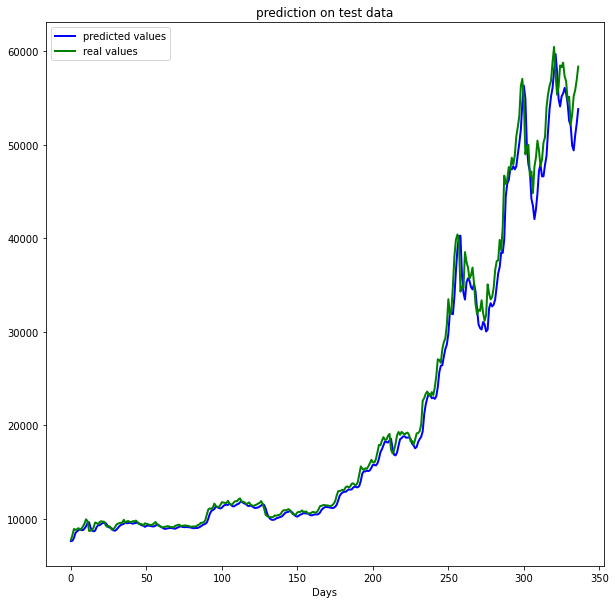

In [427]:
preds = model.predict(X_test) * max
plt.figure( figsize=( 10 , 10 ) );
plt.plot(preds , c='blue' , label='predicted values' , linewidth=2);
plt.plot(  Y_test * max , c='green' , label='real values' , linewidth=2);
plt.xlabel("Days");
plt.title("prediction on test data");
plt.legend();

### RMSE and R2

In [428]:
print(mean_absolute_error(Y_train, pred_train))
print(np.sqrt(mean_squared_error(Y_train, pred_train)))
print(r2_score(Y_train, pred_train))

0.00236509125810056
0.004029603310489117
0.9956413828657265


### RNN (Predicting closing prices)

In [429]:
data_RNN["date"] = pd.to_datetime(data_RNN["Timestamp"],unit="s").dt.date

In [430]:
data_RNN = data_RNN.dropna().set_index("date")
data = data_RNN
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
date,,,,,,,,
2011-12-31,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
2021-03-30,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


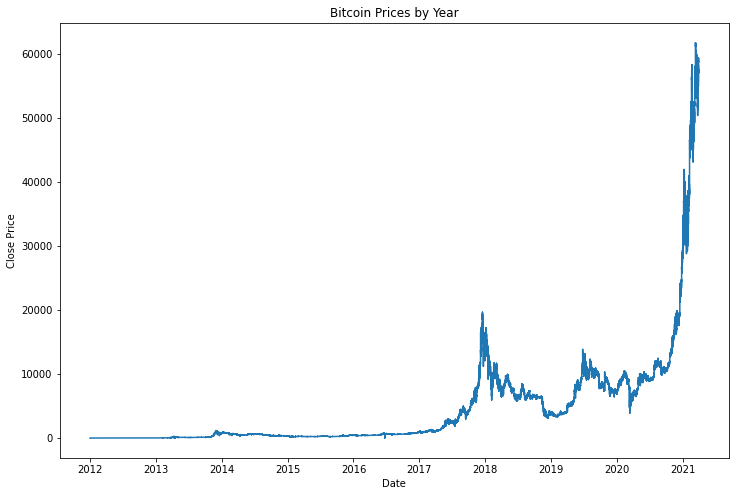

In [431]:
dataset = data.iloc[:, 4].values
date = data.index
plt.figure(figsize=(12,8))
plt.plot(date,dataset)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Bitcoin Prices by Year")
plt.show()

In [432]:
group = data.groupby("date")
data = group["Close"].mean()
pd.DataFrame(data)
dataset = data.values
dataset

array([4.48250000e+00, 4.80666667e+00, 5.00000000e+00, ...,
       5.69156300e+04, 5.83493571e+04, 5.87781800e+04])

In [433]:
dataset = data.values
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(3376, 1)

### Building the model (RNN)

In [434]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

In [435]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train) - time_stemp - 1):
    a = train[i:(i + time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [436]:
dataX = []
dataY = []
for i in range(len(test) - time_stemp -1):
    a = test[i:(i + time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)

In [437]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))

In [438]:
regressor = Sequential()
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (trainX.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
95/95 [==============================] - 4s 12ms/step - loss: 0.0645
Epoch 2/100
95/95 [==============================] - 1s 9ms/step - loss: 0.0104
Epoch 3/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0049
Epoch 4/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0030
Epoch 5/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0024
Epoch 6/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0018
Epoch 7/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0015
Epoch 8/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 9/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 10/100
95/95 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 11/100
95/95 [==============================] - 1s 9ms/step - loss: 9.7400e-04
Epoch 12/100
95/95 [==============================] - 1s 8ms/step - loss: 9.6678e-04
Epoch 13/100
95/95 [========

In [439]:
trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

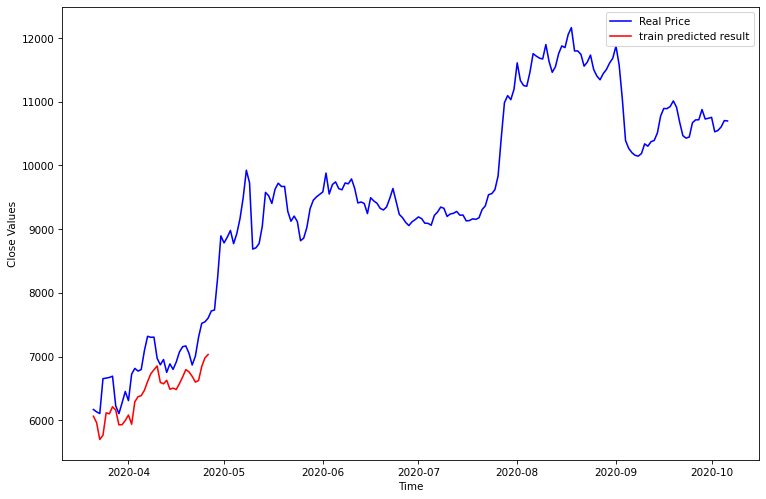

In [440]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict) + time_stemp, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_stemp * 2) + 1:len(dataset) - 1, :] = testPredict

plt.figure(figsize=(12,8), dpi=75, facecolor ="w", edgecolor="k")
plt.plot(data.index[3000:3200],scaler.inverse_transform(dataset[3000:3200]),color ="b", label="Real Price")
plt.plot(data.index[3000:3200],trainPredictPlot[3000:3200], color ="r", label="train predicted result")
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.legend()
plt.show()

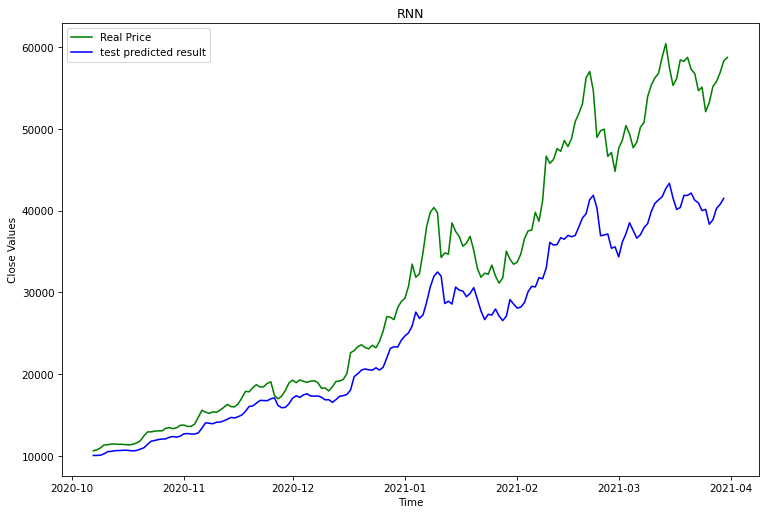

In [441]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict) + time_stemp, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (time_stemp * 2) + 1:len(dataset) - 1, :] = testPredict

plt.figure(figsize=(12,8), dpi=75, facecolor ="w", edgecolor="k")
plt.plot(data.index[3200:],scaler.inverse_transform(dataset[3200:]),color ="g", label="Real Price")
plt.plot(data.index[3200:],testPredictPlot[3200:], color ="b", label="test predicted result")
plt.xlabel("Time")
plt.ylabel("Close Values")
plt.legend()
plt.title("RNN")
plt.show()

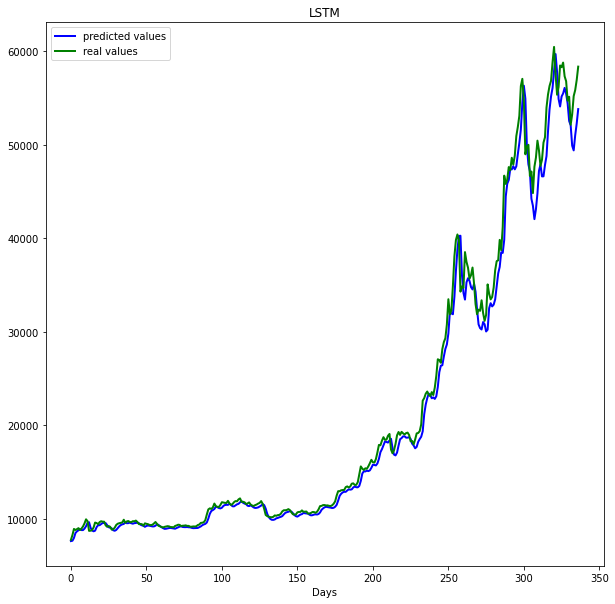

In [442]:
preds = model.predict(X_test) * max
plt.figure( figsize=( 10 , 10 ) );
plt.plot(preds , c='blue' , label='predicted values' , linewidth=2);
plt.plot(  Y_test * max , c='green' , label='real values' , linewidth=2);
plt.xlabel("Days");
plt.title("LSTM");
plt.legend();

### Comparing the results, we obtain that LSTM predicts with better accuracy